## El objeto Data frames

Un objeto  `Series` de pandas proporciona un contenedor para matrices unidimensionales, que pueden usar etiquetas descriptivas para los elementos y que proporciona acceso rápido a estadísticas descriptivas y visualización. Para matrices de mayor dimensión (matrices bidimensionales o tablas), la estructura de datos correspondiente es el objeto `DataFrame` de pandas. Este objeto puede verse como una colección de objetos `Series` con un índice común.

Hay muchas maneras de inicializar un `DataFrame`. Para ejemplos simples, la forma más fácil es pasar una lista anidada de Python o un  diccionario  al constructor del objeto `DataFrame`. 

In [1]:
import pandas as pd
import numpy as np
import numexpr as ne
import numpy as np
from numba import jit
np.random.seed(1234)
%matplotlib inline
import matplotlib.pyplot as plt
    
df = pd.DataFrame([[909976, "Suecia"], [8615246, "Inglaterra"], [2872086, "Italia"], [2273305, "Francia"]])
df

,0,1
0,909976,Suecia
1,8615246,Inglaterra
2,2872086,Italia
3,2273305,Francia


El resultado es una estructura de datos tabular con filas y columnas. Al igual que con un objeto `Series`, podemos usar la indexación  para las filas asignando una secuencia de etiquetas al atributo de `ìndex` y  además, podemos establecer el atributo `columns` en una secuencia de etiquetas para las columnas:

In [2]:
df.index = ["Oslo", "Londres", "Roma", "Paris"]
df.columns = ["Poblacion", "Estado"]
df

,Poblacion,Estado
Oslo,909976,Suecia
Londres,8615246,Inglaterra
Roma,2872086,Italia
Paris,2273305,Francia


Los atributos `index` y `columns` también se pueden establecer utilizando los argumentos  correspondientes al objeto `DataFrame` cuando este se crea:

In [3]:
df = pd.DataFrame([[909976, "Suecia"], [8615246, "Inglaterra"],[2872086, "Italy"], [2273305, "France"]], 
                  index=["Oslo", "Londres", "Roma", "Paris"], columns=["Poblacion", "Estado"])

df

,Poblacion,Estado
Oslo,909976,Suecia
Londres,8615246,Inglaterra
Roma,2872086,Italy
Paris,2273305,France


Una forma alternativa de crear un data frame, a veces  más conveniente, es pasar un diccionario conlos títulos de las columnas como claves y los datos de la columnas como valores:

In [4]:
df = pd.DataFrame({"Poblacion": [909976, 8615246, 2872086, 2273305],
                   "Estado ": ["Suecia", "Inglaterra", "Italia", "Francia"]},
                  index=["Oslo", "Londres", "Roma", "Paris"])

df

,Estado,Poblacion
Oslo,Suecia,909976
Londres,Inglaterra,8615246
Roma,Italia,2872086
Paris,Francia,2273305


Podemos acceder a cada columna de un data frame, usando el nombre de la columna como atributo,o de forma alternativa indexando con la etiqueta de la columna, como es el caso de`df.["Poblacion"]`:

In [5]:
df.Poblacion

Oslo        909976
Londres    8615246
Roma       2872086
Paris      2273305
Name: Poblacion, dtype: int64

El resultado de extraer una columna de un `DataFrame` es un objeto `Series`, que podemos procesar y manipular con los métodos discutidos anteriormente. Se puede acceder a filas de una instancia de `DataFrame` utilizando el atributo `ix`. La indexación de este atributo también da como resultado un objeto `Series`, que corresponde a una fila del data frame original:

In [6]:
df.ix["Paris"]

Estado       Francia
Poblacion    2273305
Name: Paris, dtype: object

Pasar una lista de etiquetas de fila al indexador `ix` da como resultado un nuevo `DataFrame` que es un subconjunto del `DataFrame` original, que contiene sólo las filas seleccionadas:

In [7]:
df.ix[["Paris", "Roma"]]

,Estado,Poblacion
Paris,Francia,2273305
Roma,Italia,2872086


El indexador `ix` también se puede usar para seleccionar simultáneamente filas y columnas, pasando primero una etiqueta de fila (o una lista de ellas) y una etiqueta de columna (o una lista de ellas). El resultado es un `DataFrame`, un objeto `Series` o un valor de elemento, dependiendo del número de columnas y filas que se seleccionan:

In [8]:
df.ix[["Paris", "Roma"], "Poblacion"]

Paris    2273305
Roma     2872086
Name: Poblacion, dtype: int64

Podemos calcular funciones de  estadística descriptiva, usando los mismos métodos que  hemos utilizado para el objeto `Series`. Cuando se invoca esos métodos (`media`, `std`, `median`, `min`, `max`, etc.) para un `DataFrame`, se realiza el cálculo para cada columna con tipos de datos numéricos:

In [9]:
df.mean()

Poblacion    3667653.25
dtype: float64

En este caso, sólo una de las dos columnas tiene un tipo de dato numérico (`Población`). Utilizando el método `ìnfo` de un `DataFrame` y el atributo  `dtype` , podemos obtener un resumen del contenido de un `DataFrame`  y los tipos de datos de cada  columna:

In [10]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Oslo to Paris
Data columns (total 2 columns):
Estado       4 non-null object
Poblacion    4 non-null int64
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


Las ventajas reales del uso de pandas surgen cuando se trata de conjuntos de datos más grandes y más complejos que los ejemplos que hemos utilizado hasta ahora. Tales datos rara vez se pueden definir como listas explícitas o diccionarios, que se pueden pasar al inicializador del `DataFrame`. Una situación más común es que los datos deben ser leídos de un archivo, o alguna otra fuente externa. La librería pandas soporta numerosos métodos para leer datos de archivos de diferentes formatos. Aquí utilizamos la función `read_csv` para leer datos y crear un objeto `DataFrame` desde un archivo CSV. Esta función acepta un gran número de argumentos opcionales para ajustar su comportamiento.


In [11]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

 Algunos de los argumentos más útiles son `header` (especifica qué fila, si existe, contiene un encabezado con nombres de columna), `skiprows` (número de filas a omitir antes de comenzar a leer los datos o una lista de números de línea de líneas a omitir), `delimiter` (el carácter que se utiliza como delimitador entre los valores de columna), `encoding` (el nombre de la codificación utilizada en el archivo, por ejemplo `utf-8`) y `nrows` (número de filas a leer).

El primer y único argumento obligatorio para la función `pd.read_csv` es el nombre de archivo o un `URL`  de donde proceden los  datos. Por ejemplo, para leer  un conjunto de datos almacenado en un archivo denominado `european_cities.csv`, simplemente podemos llamar a `pd.read_csv ("european_cities.csv")`, ya que el delimitador por defecto es `","` y el encabezado  toma por defecto  la primera línea:

In [12]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)

In [13]:
df_pop[:3]

,Rango,Ciudad,Estado,Poblacion,Fecha de censo/estimado
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014


Este conjunto de datos es similar a los datos de ejemplos que se utilizaron anteriormente , pero aquí hay columnas adicionales y muchas más filas para otras ciudades. Una vez que se lee un conjunto de datos en un objeto `DataFrame`, es útil comenzar inspeccionando el resumen proporcionado por el método `info`, para comenzar a formarse una idea de las propiedades del conjunto de datos:

In [14]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rango                      105 non-null int64
Ciudad                     105 non-null object
Estado                     105 non-null object
Poblacion                  105 non-null object
Fecha de censo/estimado    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Aquí vemos que hay `105` filas y cinco columnas en este conjunto de datos. Sólo la columna `Rank` tiene datos de tipo numérico. En particular, la columna `Poblacion` aún no es de tipo numérico dado que sus valores son del formato `"8,615,246"` y  por lo tanto, se interpreta como valores de cadena por la función `read_csv`.

También es informativo mostrar una vista tabular de los datos. Sin embargo, este conjunto de datos es demasiado grande para mostrarlo en su totalidad y en situaciones como ésta, los métodos `head` y `tail` son útiles para crear un conjunto de datos truncado que contiene las primeras y últimas filas, respectivamente. Ambas funciones toman un argumento opcional que especifica cuántas filas deben incluirse en el `DataFrame` truncado. Observe también que `df.head(n)` es equivalente a `df[: n]`, donde `n` es un entero.

In [15]:
df_pop.head()

,Rango,Ciudad,Estado,Poblacion,Fecha de censo/estimado
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


La visualización de un `DataFrame` truncado proporciona  una buena idea de cómo se ven los datos y de lo que queda por hacer antes de que los datos estén listos para su análisis. Es común tener que transformar columnas de una manera u otra,  reordenar la tabla ordenando por una columna específica, o ordenando el índice. 

Hay  algunos métodos para modificar objetos `DataFrame`. En primer lugar, podemos crear nuevas columnas y actualizar columnas en un `DataFrame` simplemente asignando un objeto `Series` al DataFrame indexado por el nombre de la columna y podemos eliminar las columnas usando la palabra clave `del` de  Python.

El método `apply` es una poderosa herramienta para transformar el contenido de una columna. Este método crea y devuelve un nuevo objeto `Series` para el que se ha aplicado una función pasada a `apply` a cada elemento de la columna original.  Por ejemplo, podemos usar el método `apply` para transformar los elementos de la  columna `Poblacion` a enteros, pasando una función lambda que elimina los caracteres `","`  que forman las cadenas y  hace `cast`, los resultados a un entero. Aquí asignamos la columna transformada a una nueva columna con el nombre `Poblacion_numerica`. Utilizando el mismo método, también ordenar los valores de `Estado` mediante la eliminación de espacios en blanco de sus elementos extras mediante el método de cadena `strip`.

In [16]:
df_pop["Poblacion_numerica"] = df_pop.Poblacion.apply(lambda x: int(x.replace(",", "")))

df_pop["Estado"].values[:3] #espacios en blanco extra
np.array([' United Kingdom', ' Germany', ' Spain'], dtype=object)
df_pop["Estado"] = df_pop["Estado"].apply(lambda x: x.strip())

df_pop.head()

,Rango,Ciudad,Estado,Poblacion,Fecha de censo/estimado,Poblacion_numerica
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


La inspección de los tipos de datos de las columnas en el `DataFrame` actualizado confirma que la nueva columna `Poblacion_numerica` es realmente de tipo entero (mientras que la columna `Poblacion` no cambia):

In [17]:
df_pop.dtypes

Rango                       int64
Ciudad                     object
Estado                     object
Poblacion                  object
Fecha de censo/estimado    object
Poblacion_numerica          int64
dtype: object

Podemos también necesitar cambiar el índice a una de las columnas del `DataFrame`. En el ejemplo actual, es posible que desee utilizar la columna `Ciudad` como índice. Podemos lograr esto usando el método `set_index`, que toma como argumento el nombre de la columna que se usará como índice. El resultado es un nuevo objeto `DataFrame` y el `DataFrame` original no ha cambiado. Además, utilizando el método `sort_index` podemos ordenar el data frame con respecto al índice:

In [18]:
df_pop2 = df_pop.set_index("Ciudad")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Rango,Estado,Poblacion,Fecha de censo/estimado,Poblacion_numerica
Ciudad,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


El método `sort_index` también acepta una lista de nombres de columnas, en cuyo caso se crea un índice jerárquico. Un índice jerárquico utiliza tuplas de etiquetas de índice para alinear las filas en el data frame . Podemos utilizar el método `sortlevel`, que toma un número entero `n` como argumento, para ordenar las filas en un `DataFrame` de acuerdo al `n`-ésimo nivel del índice jerárquico. En el siguiente ejemplo, creamos un índice jerárquico con `Estado` y `Ciudad` como índices y usamos el método `sortlevel` para ordenar por el primer índice (`Estado`):

In [19]:
df_pop3 = df_pop.set_index(["Estado", "Ciudad"]).sortlevel(0)
df_pop3.head(9)

Rango  Poblacion Fecha de censo/estimado  \
Estado         Ciudad                                                   
Austria        Vienna            7  1,794,770          1 January 2015   
Belgium        Antwerp          59    510,610          1 January 2014   
               Brussels[17]     16  1,175,831          1 January 2014   
Bulgaria       Plovdiv          84    341,041        31 December 2013   
               Sofia            14  1,291,895        14 December 2014   
               Varna            85    335,819        31 December 2013   
Croatia        Zagreb           24    790,017           31 March 2011   
Czech Republic Brno             76    378,327          1 January 2013   
               Prague           15  1,246,780          1 January 2013   

                             Poblacion_numerica  
Estado         Ciudad                            
Austria        Vienna                   1794770  
Belgium        Antwerp                   510610  
               Brussels[17]             1175831  
Bulgaria       Plovdiv                   341041  
               Sofia                    1291895  
               Varna                     335819  
Croatia        Zagreb                    790017  
Czech Republic Brno                      378327  
               Prague                   1246780

Un `DataFrame` con un índice jerárquico puede ser indexado parcialmente usando solamente su índice de nivel cero (`df3.ix ["Bulgaria"]`) o completamente indexado usando una tupla de todos los índices jerárquicos (`df3.ix [("Bulgaria", "Sofia")]`):

In [20]:
 df_pop3.ix["Bulgaria"]

,Rango,Poblacion,Fecha de censo/estimado,Poblacion_numerica
Ciudad,,,,
Plovdiv,84,"341,041",31 December 2013,341041
Sofia,14,"1,291,895",14 December 2014,1291895
Varna,85,"335,819",31 December 2013,335819


In [21]:
df_pop3.ix[("Bulgaria", "Sofia")]

Rango                                    14
Poblacion                         1,291,895
Fecha de censo/estimado    14 December 2014
Poblacion_numerica                  1291895
Name: (Bulgaria, Sofia), dtype: object

Si queremos ordenar una columna no por el índice, podemos usar el método `sort`. Este toma, el nombre de una columna o una lista de nombres de columna con respecto al cual se va a ordenar el `DataFrame`. También acepta el argumento `ascending`, que es un booleano o una lista de valores booleanos que especifica si la columna correspondiente se va a ordenar en orden ascendente o descendente:

In [22]:
df_pop.set_index("Ciudad").sort_values(["Estado", "Poblacion_numerica"], ascending=[False, True]).head()

,Rango,Estado,Poblacion,Fecha de censo/estimado,Poblacion_numerica
Ciudad,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


Con datos categóricos como la columna `Estado`, con  frecuencia es interesante resumir cuántos valores de cada categoría contiene una columna. Estos conteos se pueden calcular utilizando el método `value_counts` (del objeto `Series`). Por ejemplo, para contar el número de ciudades que cada país tiene en la lista de las `105` ciudades más grandes de Europa, podemos utilizar:

In [23]:
conteo_ciudad = df_pop.Estado.value_counts()
conteo_ciudad.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: Estado, dtype: int64

En este ejemplo, vemos a partir de los resultados que el estado con el mayor número de ciudades en la lista es `Germany`, con 19 ciudades, seguido por el `United Kingdom ` con 16 ciudades  y así sucesivamente. Una pregunta relacionada,  es cuán grande es la población total de todas las ciudades dentro de un estado. Para responder a este tipo de preguntas podemos preceder de dos maneras: primero, podemos crear un índice jerárquico usando `Estado` y `Ciudad` y usar el método `sum` para reducir el `DataFrame` a lo largo de uno de los índices. En este caso, queremos sumar todas las entradas dentro del nivel de índice `Estadp`, por lo que podemos usar sum `(level = "Estado")`,  que elimina el índice `Ciudad`. Para la presentación también clasificamos el `DataFrame` resultante en orden descendente de la columna `Poblacion_numerica`:

In [24]:
df_pop3 = df_pop[["Estado", "Ciudad", "Poblacion_numerica"]].set_index(["Estado", "Ciudad"])
df_pop4 = df_pop3.sum(level="Estado").sort_values("Poblacion_numerica", ascending=False)
df_pop4.head()

,Poblacion_numerica
Estado,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


En segundo lugar, podemos obtener los mismos resultados usando el método `groupby`, que nos permite agrupar filas de un `DataFrame` por los valores de una columna dada  y aplicar una función de reducción sobre el objeto resultante (por ejemplo, `sum`, `mean`, `min`, `max`, etc.). El resultado es un nuevo `DataFrame` con columnas agrupadas  como índice.

Usando este método podemos calcular la población total en las 105 ciudades, agrupadas por estados, de la siguiente manera:

In [25]:
df_pop5 = (df_pop.drop("Rango", axis=1)
                 .groupby("Estado").sum()
                 .sort_values("Poblacion_numerica", ascending=False))
df_pop5

,Poblacion_numerica
Estado,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


Ten  en cuenta que aquí también usamos el método `drop` para eliminar la columna `Rango` (así  `axis= 1`, usa `axis = 0` para eliminar filas) del `DataFrame`. Finalmente, utilizamos el método `plot` del objeto `Series` para realizar algunos gráficos de barras para el recuento de ciudades y la población total:

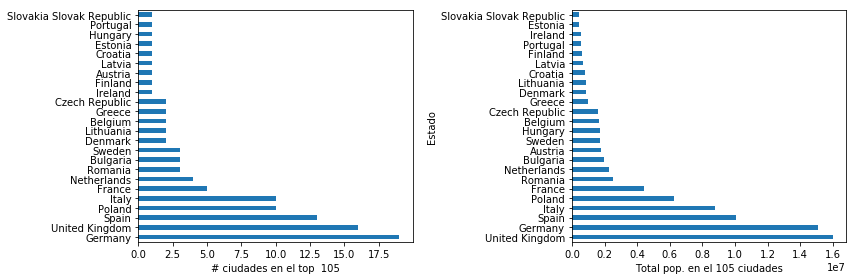

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

conteo_ciudad.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# ciudades en el top  105")
df_pop5.Poblacion_numerica.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. en el 105 ciudades")

fig.tight_layout()

## Ejemplo general

In [27]:
beisbol = pd.read_csv("baseball.csv", index_col='id')
beisbol.head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [28]:
jugador_id = beisbol.jugador + beisbol.fecha.astype(str)
beisbol_nid = beisbol.copy()
beisbol_nid.index = jugador_id
beisbol_nid.head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Verifamos si todo esta ok

beisbol_nid.index.is_unique

False

Así los índices no tienen que ser únicos. Nuestra elección no es única, ya que algunos jugadores cambian de equipo.

In [30]:
pd.Series(beisbol_nid.index).value_counts()

sweenma012007    2
trachst012007    2
wellsda012007    2
gomezch022007    2
claytro012007    2
loftoke012007    2
benitar012007    2
hernaro012007    2
cirilje012007    2
francju012007    2
wickmbo012007    2
coninje012007    2
glavito022007    1
myersmi012007    1
bondsba012007    1
gordoto012007    1
walketo042007    1
helliri012006    1
sandere022007    1
edmonji012007    1
kleskry012007    1
cormirh012007    1
graffto012007    1
tavarju012007    1
stairma012007    1
stinnke012007    1
ramirma022007    1
finlest012007    1
sosasa012007     1
greensh012007    1
                ..
thomeji012007    1
seaneru012007    1
rogerke012007    1
biggicr012007    1
loaizes012007    1
williwo022007    1
ausmubr012007    1
weathda012007    1
johnsra052006    1
stantmi022007    1
myersmi012006    1
witasja012007    1
seleaa012007     1
mesajo012007     1
clemero022007    1
thomafr042007    1
seleaa012006     1
parkch012007     1
guarded012007    1
perezne012007    1
timlimi012007    1
wakefti01200

La consecuencia más importante de un índice no único es que la indexación por etiquetas devolverá varios valores para algunas etiquetas:

In [31]:
beisbol_nid.ix['francju012007']

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
francju012007,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0
francju012007,francju01,2007,1,NYN,NL,40,50,7,10,0,...,8.0,2.0,1.0,10,13.0,0.0,0.0,0.0,1.0,1.0


Creamos un índice único combinado `jugador, equipo` y `fecha`:

In [32]:
jugador_unico = beisbol.jugador + beisbol.equipo + beisbol.fecha.astype(str)
beisbol_nid  = beisbol.copy()
beisbol_nid.index  =jugador_unico
beisbol_nid.head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [33]:
beisbol_nid.index.is_unique

True

El reindexado permite a los usuarios manipular las etiquetas de datos en un `DataFrame`. Hace que  un `DataFrame` se ajuste a un  nuevo índice y  opcionalmente, completa  los datos que faltan si se solicitan. Un simple uso de `reindex` es alterar el orden de las filas:

In [34]:
beisbol.reindex(beisbol.index[::-1]).head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


El índice  `id`  no es secuencial. Digamos que queríamos completar la tabla con cada valor de `id`. Podríamos especificar e indexar que es una secuencia desde el primero hasta el último número `ìd` en la base de datos y Pandas completaría los datos faltantes con valores `NaN`:

In [35]:
id_rango = range(beisbol.index.values.min(), beisbol.index.values.max())
beisbol.reindex(id_rango).head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006.0,2.0,CHN,NL,19.0,50.0,6.0,14.0,1.0,...,2.0,1.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0
88642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88643,schilcu01,2006.0,1.0,BOS,AL,31.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88645,myersmi01,2006.0,1.0,NYA,AL,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
## Completamos los valores NaN

beisbol.reindex(id_rango, method="ffill", columns=['jugador', 'fecha']).head()

,jugador,fecha
id,,
88641,womacto01,2006
88642,womacto01,2006
88643,schilcu01,2006
88644,schilcu01,2006
88645,myersmi01,2006


In [37]:
beisbol.shape

(100, 22)

In [38]:
# Removemos columnas o filas usando el metodo drop

beisbol.drop([89525, 89526])

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0


In [39]:
beisbol.drop(['ibb','hbp'], axis =1)

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,12,6,40.0,7.0,0.0,46,55.0,3.0,4.0,6.0
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,2,15,73.0,0.0,1.0,69,58.0,0.0,6.0,14.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,0,0,0.0,0.0,0.0,1,7.0,6.0,0.0,1.0
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,0,0,8.0,0.0,0.0,4,10.0,0.0,1.0,1.0


La indexación funciona de manera análoga a la indexación en matrices de NumPy, excepto que podemos usar las etiquetas del objeto `Index` para extraer valores además de matrices de enteros.

In [40]:
# Objeto Series 

aciertos = beisbol_nid.h
aciertos

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
seleaa01LAN2006       5
francju01ATL2007     10
francju01NYN2007     10
zaungr01TOR2007      80
witasja01TBA2007      0
williwo02HOU2007      6
wickmbo01ARI2007      0
wickmbo01ATL2007      0
whitero02MIN2007     19
whiteri01HOU2007      0
wellsda01LAN2007      4
wellsda01SDN2007      4
weathda01CIN2007      0
walketo04OAK2007     13
wakefti01BOS2007      0
vizquom01SFN2007    126
villoro01NYA2007      0
valenjo03NYN2007     40
trachst01CHN2007      1
trachst01BAL2007      0
timlimi01BOS2007      0
thomeji01CHA2007    119
thomafr04TOR2007    147
                   ... 
guarded01CIN2007      0
griffke02CIN2007    146
greensh01NYN2007    130
graffto01MIL2007     55
gordoto01PHI2007      0
gonzalu01LAN2007    129
gomezch02CLE2007     15
gomezch02BAL2007     51
glavito02NYN2007     12
floydcl01CHN2007     80
finlest01COL2007

In [41]:
# Estilo Numpy

aciertos[:4]

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
helliri01MIL2006     0
Name: h, dtype: int64

In [42]:
# indexando por etiquetas

aciertos[['womacto01CHN2006','schilcu01BOS2006']]

womacto01CHN2006    14
schilcu01BOS2006     1
Name: h, dtype: int64

In [43]:
# Slicing 

aciertos['womacto01CHN2006': 'valenjo03NYN2007']

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
seleaa01LAN2006       5
francju01ATL2007     10
francju01NYN2007     10
zaungr01TOR2007      80
witasja01TBA2007      0
williwo02HOU2007      6
wickmbo01ARI2007      0
wickmbo01ATL2007      0
whitero02MIN2007     19
whiteri01HOU2007      0
wellsda01LAN2007      4
wellsda01SDN2007      4
weathda01CIN2007      0
walketo04OAK2007     13
wakefti01BOS2007      0
vizquom01SFN2007    126
villoro01NYA2007      0
valenjo03NYN2007     40
Name: h, dtype: int64

En un `DataFrame` podemos dividir ya sea por uno o ambos ejes:

In [44]:
beisbol_nid[['h','ab']]

,h,ab
womacto01CHN2006,14,50
schilcu01BOS2006,1,2
myersmi01NYA2006,0,0
helliri01MIL2006,0,3
johnsra05NYA2006,1,6
finlest01SFN2006,105,426
gonzalu01ARI2006,159,586
seleaa01LAN2006,5,26
francju01ATL2007,10,40
francju01NYN2007,10,50


In [45]:
beisbol_nid[beisbol_nid.ab>350]

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
finlest01SFN2006,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomeji01CHA2007,thomeji01,2007,1,CHA,AL,130,432,79,119,19,...,96.0,0.0,1.0,95,134.0,11.0,6.0,0.0,3.0,10.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
stairma01TOR2007,stairma01,2007,1,TOR,AL,125,357,58,103,28,...,64.0,2.0,1.0,44,66.0,5.0,2.0,0.0,2.0,7.0
sosasa01TEX2007,sosasa01,2007,1,TEX,AL,114,412,53,104,24,...,92.0,0.0,0.0,34,112.0,3.0,3.0,0.0,5.0,11.0
sheffga01DET2007,sheffga01,2007,1,DET,AL,133,494,107,131,20,...,75.0,22.0,5.0,84,71.0,2.0,9.0,0.0,6.0,10.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
ramirma02BOS2007,ramirma02,2007,1,BOS,AL,133,483,84,143,33,...,88.0,0.0,0.0,71,92.0,13.0,7.0,0.0,8.0,21.0


El método `ix` nos permite seleccionar subconjuntos de filas y columnas de una manera intuitiva:

In [46]:
beisbol_nid.ix['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h      159
X2b     52
X3b      2
hr      15
Name: gonzalu01ARI2006, dtype: object

In [47]:
beisbol_nid.ix[['gonzalu01ARI2006', 'finlest01SFN2006' ], 5:8]

,g,ab,r
gonzalu01ARI2006,153,586,93
finlest01SFN2006,139,426,66


In [48]:
beisbol_nid.ix[:'whitero02MIN2007', 'hr']

womacto01CHN2006     1
schilcu01BOS2006     0
myersmi01NYA2006     0
helliri01MIL2006     0
johnsra05NYA2006     0
finlest01SFN2006     6
gonzalu01ARI2006    15
seleaa01LAN2006      0
francju01ATL2007     0
francju01NYN2007     1
zaungr01TOR2007     10
witasja01TBA2007     0
williwo02HOU2007     1
wickmbo01ARI2007     0
wickmbo01ATL2007     0
whitero02MIN2007     4
Name: hr, dtype: int64

El método `xs` extrae una única columna o fila por etiquetas y retorna un objeto `Series`.

In [49]:
beisbol_nid.xs('zaungr01TOR2007')

jugador      zaungr01
fecha            2007
temporada           1
equipo            TOR
lg                 AL
g                 110
ab                331
r                  43
h                  80
X2b                24
X3b                 1
hr                 10
rbi                52
sb                  0
cs                  0
bb                 51
so                 55
ibb                 8
hbp                 2
sh                  1
sf                  6
gidp                9
Name: zaungr01TOR2007, dtype: object

Los objetos `DataFrame` y `Series` permiten realizar varias operaciones en un solo objeto o entre dos o más objetos.

In [50]:
hr2006 = beisbol[beisbol.fecha == 2006].xs('hr', axis =1)
hr2006.index = beisbol.jugador[beisbol.fecha == 2006]

hr2007 = beisbol[beisbol.fecha == 2007].xs('hr', axis =1)
hr2007.index = beisbol.jugador[beisbol.fecha == 2007]

hr2006 = pd.Series(beisbol.hr[beisbol.fecha == 2006].values, index =  beisbol.jugador[beisbol.fecha == 2006])
hr2007 = pd.Series(beisbol.hr[beisbol.fecha == 2007].values, index =  beisbol.jugador[beisbol.fecha == 2007])

In [51]:
hr_total = hr2006 + hr2007
hr_total

jugador
alomasa02     NaN
aloumo01      NaN
ausmubr01     NaN
benitar01     NaN
benitar01     NaN
biggicr01     NaN
bondsba01     NaN
cirilje01     NaN
cirilje01     NaN
claytro01     NaN
claytro01     NaN
clemero02     NaN
coninje01     NaN
coninje01     NaN
cormirh01     NaN
delgaca01     NaN
easleda01     NaN
edmonji01     NaN
embreal01     NaN
finlest01     7.0
floydcl01     NaN
francju01     NaN
francju01     NaN
glavito02     NaN
gomezch02     NaN
gomezch02     NaN
gonzalu01    30.0
gordoto01     NaN
graffto01     NaN
greensh01     NaN
             ... 
sosasa01      NaN
sprinru01     NaN
stairma01     NaN
stantmi02     NaN
stinnke01     NaN
suppaje01     NaN
sweenma01     NaN
sweenma01     NaN
tavarju01     NaN
thomafr04     NaN
thomeji01     NaN
timlimi01     NaN
trachst01     NaN
trachst01     NaN
valenjo03     NaN
villoro01     NaN
vizquom01     NaN
wakefti01     NaN
walketo04     NaN
weathda01     NaN
wellsda01     NaN
wellsda01     NaN
whiteri01     NaN
whitero02     NaN
wi

La alineación de datos de Pandas coloca valores `NaN` para etiquetas que no se solapan en las dos `Series`.


In [52]:
hr_total[hr_total.notnull()]

jugador
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
dtype: float64

Usamos el argumento `fill_value` para insertar un cero,a etiquetas que no se solapan, que tienen el valor `NaN`: 

In [53]:
hr2007.add(hr2006, fill_value=0)

jugador
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
biggicr01    10.0
bondsba01    28.0
cirilje01     0.0
cirilje01     2.0
claytro01     0.0
claytro01     1.0
clemero02     0.0
coninje01     0.0
coninje01     6.0
cormirh01     0.0
delgaca01    24.0
easleda01    10.0
edmonji01    12.0
embreal01     0.0
finlest01     7.0
floydcl01     9.0
francju01     0.0
francju01     1.0
glavito02     0.0
gomezch02     0.0
gomezch02     1.0
gonzalu01    30.0
gordoto01     0.0
graffto01     9.0
greensh01    10.0
             ... 
sosasa01     21.0
sprinru01     0.0
stairma01    21.0
stantmi02     0.0
stinnke01     1.0
suppaje01     0.0
sweenma01     0.0
sweenma01     2.0
tavarju01     0.0
thomafr04    26.0
thomeji01    35.0
timlimi01     0.0
trachst01     0.0
trachst01     0.0
valenjo03     3.0
villoro01     0.0
vizquom01     4.0
wakefti01     0.0
walketo04     0.0
weathda01     0.0
wellsda01     0.0
wellsda01     0.0
whiteri01     0.0
whitero02     4.0
wi

Podemos utilizar **broadcast** entre filas y columnas.

In [54]:
beisbol.hr - beisbol.hr.max()

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
89330   -25
89333   -35
89334   -34
89335   -35
89336   -35
89337   -31
89338   -35
89339   -35
89340   -35
89341   -35
89343   -35
89345   -35
89347   -31
89348   -35
89352   -32
89354   -35
89355   -35
89359   -35
89360     0
89361    -9
         ..
89460   -35
89462    -5
89463   -25
89464   -26
89465   -35
89466   -20
89467   -35
89468   -34
89469   -35
89473   -26
89474   -34
89480   -35
89481   -23
89482   -25
89489   -11
89493   -35
89494   -35
89495   -29
89497   -35
89498   -35
89499   -34
89501   -35
89502   -33
89521    -7
89523   -25
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, dtype: int64

Elegimos a un unico jugador y lo comparamos con el resto del grupo, para hacer estadística:

In [55]:
beisbol.ix[89521]["jugador"]

'bondsba01'

In [56]:
estadistica = beisbol[['h', 'X2b', 'X3b', 'hr']]
diff = estadistica -estadistica.xs(89521)

diff[:8]

,h,X2b,X3b,hr
id,,,,
88641,-80,-13,0,-27
88643,-93,-14,0,-28
88645,-94,-14,0,-28
88649,-94,-14,0,-28
88650,-93,-14,0,-28
88652,11,7,12,-22
88653,65,38,2,-13
88662,-89,-13,0,-28


Usemos la función `apply` para cada columna o fila de un objeto `DataFrame`. 

In [57]:
estadistica.apply(np.median)

h      8.0
X2b    1.0
X3b    0.0
hr     0.0
dtype: float64

In [58]:
estadistica_rango = lambda x: x.max() - x.min()
estadistica.apply(estadistica_rango)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Los objetos Pandas incluyen métodos para reordenar datos.

In [59]:
beisbol_nid.sort_index().head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02NYN2007,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01NYN2007,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01HOU2007,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01FLO2007,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01SFN2007,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
beisbol_nid.sort_index(ascending=False).head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
zaungr01TOR2007,zaungr01,2007,1,TOR,AL,110,331,43,80,24,...,52.0,0.0,0.0,51,55.0,8.0,2.0,1.0,6.0,9.0
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
witasja01TBA2007,witasja01,2007,1,TBA,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
williwo02HOU2007,williwo02,2007,1,HOU,NL,33,59,3,6,0,...,2.0,0.0,0.0,0,25.0,0.0,0.0,5.0,0.0,1.0
wickmbo01ATL2007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
beisbol_nid.sort_index(axis =1).head()

,X2b,X3b,ab,bb,cs,equipo,fecha,g,gidp,h,...,ibb,jugador,lg,r,rbi,sb,sf,sh,so,temporada
womacto01CHN2006,1,0,50,4,1.0,CHN,2006,19,0.0,14,...,0.0,womacto01,NL,6,2.0,1.0,0.0,3.0,4.0,2
schilcu01BOS2006,0,0,2,0,0.0,BOS,2006,31,0.0,1,...,0.0,schilcu01,AL,0,0.0,0.0,0.0,0.0,1.0,1
myersmi01NYA2006,0,0,0,0,0.0,NYA,2006,62,0.0,0,...,0.0,myersmi01,AL,0,0.0,0.0,0.0,0.0,0.0,1
helliri01MIL2006,0,0,3,0,0.0,MIL,2006,20,0.0,0,...,0.0,helliri01,NL,0,0.0,0.0,0.0,0.0,2.0,1
johnsra05NYA2006,0,0,6,0,0.0,NYA,2006,33,0.0,1,...,0.0,johnsra05,AL,0,0.0,0.0,0.0,0.0,4.0,1


Ordenamos un objeto `Series` por valor en lugar de etiquetas usando `order`.

In [62]:
beisbol.hr.sort_values(ascending=False)

id
89360    35
89462    30
89521    28
89361    26
89378    25
89489    24
89371    21
89374    21
89396    20
89439    20
88653    15
89466    15
89533    13
89481    12
89389    11
89523    10
89330    10
89463    10
89482    10
89464     9
89473     9
89398     8
89430     7
88652     6
89495     6
89438     6
89347     4
89337     4
89352     3
89530     3
         ..
89429     0
89425     0
89451     0
89421     0
89420     0
89412     0
89411     0
89410     0
89406     0
89402     0
89431     0
89442     0
89445     0
89450     0
89388     0
89384     0
89363     0
89452     0
89382     0
89381     0
89460     0
89375     0
89465     0
89372     0
89467     0
89370     0
89367     0
89469     0
89365     0
89534     0
Name: hr, dtype: int64

Para un `DataFrame`, podemos ordenar de acuerdo con los valores de una o más columnas utilizando el argumento `by` de `sort_index`:

In [63]:
beisbol[['jugador','sb','cs']].sort_values(ascending = [False, True], by = ['sb','cs']).head(6)

,jugador,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0


`Ranking` no reorganiza los datos, sino que devuelve un índice que clasifica cada valor relativo a otros en `Series`.

In [64]:
beisbol.hr.rank()

id
88641     62.5
88643     29.0
88645     29.0
88649     29.0
88650     29.0
88652     76.0
88653     89.5
88662     29.0
89177     29.0
89178     62.5
89330     83.5
89333     29.0
89334     62.5
89335     29.0
89336     29.0
89337     73.5
89338     29.0
89339     29.0
89340     29.0
89341     29.0
89343     29.0
89345     29.0
89347     73.5
89348     29.0
89352     71.5
89354     29.0
89355     29.0
89359     29.0
89360    100.0
89361     97.0
         ...  
89460     29.0
89462     99.0
89463     83.5
89464     80.5
89465     29.0
89466     89.5
89467     29.0
89468     62.5
89469     29.0
89473     80.5
89474     62.5
89480     29.0
89481     87.0
89482     83.5
89489     95.0
89493     29.0
89494     29.0
89495     76.0
89497     29.0
89498     29.0
89499     62.5
89501     29.0
89502     69.0
89521     98.0
89523     83.5
89525     29.0
89526     29.0
89530     71.5
89533     88.0
89534     29.0
Name: hr, dtype: float64

Llamando el método `ranks` del objeto `DataFrame`, resulta en la clasificación de todas las columnas:

In [65]:
beisbol.rank(ascending=False).head()

,jugador,fecha,temporada,equipo,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,2.0,96.5,7.0,82.0,31.5,70.0,47.5,40.5,39.0,50.5,...,51.0,24.5,17.5,44.5,59.0,66.0,65.5,16.0,70.0,76.5
88643,37.5,96.5,57.0,88.0,81.5,55.5,73.0,81.0,63.5,78.0,...,78.5,63.5,62.5,79.0,73.0,66.0,65.5,67.5,70.0,76.5
88645,47.5,96.5,57.0,40.5,81.5,36.0,91.0,81.0,84.5,78.0,...,78.5,63.5,62.5,79.0,89.0,66.0,65.5,67.5,70.0,76.5
88649,66.0,96.5,57.0,47.0,31.5,67.5,69.0,81.0,84.5,78.0,...,78.5,63.5,62.5,79.0,67.0,66.0,65.5,67.5,70.0,76.5
88650,61.5,96.5,57.0,40.5,81.5,51.0,64.5,81.0,63.5,78.0,...,78.5,63.5,62.5,79.0,59.0,66.0,65.5,67.5,70.0,76.5


In [66]:
beisbol[['r','h', 'hr']].rank(ascending = False).head()

,r,h,hr
id,,,
88641,40.5,39.0,38.5
88643,81.0,63.5,72.0
88645,81.0,84.5,72.0
88649,81.0,84.5,72.0
88650,81.0,63.5,72.0


En este  ejemplo combinamos tres campos para obtener un índice único que no era simplemente un valor entero. Una manera más elegante de hacer esto sería crear un índice jerárquico de esos tres campos.

In [67]:
beisbol_h = beisbol.set_index(['fecha','equipo', 'jugador'])
beisbol_h.head(8)

temporada  lg    g   ab   r    h  X2b  X3b  hr   rbi  \
fecha equipo jugador                                                           
2006  CHN    womacto01          2  NL   19   50   6   14    1    0   1   2.0   
      BOS    schilcu01          1  AL   31    2   0    1    0    0   0   0.0   
      NYA    myersmi01          1  AL   62    0   0    0    0    0   0   0.0   
      MIL    helliri01          1  NL   20    3   0    0    0    0   0   0.0   
      NYA    johnsra05          1  AL   33    6   0    1    0    0   0   0.0   
      SFN    finlest01          1  NL  139  426  66  105   21   12   6  40.0   
      ARI    gonzalu01          1  NL  153  586  93  159   52    2  15  73.0   
      LAN    seleaa01           1  NL   28   26   2    5    1    0   0   0.0   

                         sb   cs  bb    so   ibb  hbp   sh   sf  gidp  
fecha equipo jugador                                                   
2006  CHN    womacto01  1.0  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
      BOS    schilcu01  0.0  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
      NYA    myersmi01  0.0  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
      MIL    helliri01  0.0  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
      NYA    johnsra05  0.0  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
      SFN    finlest01  7.0  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
      ARI    gonzalu01  0.0  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
      LAN    seleaa01   0.0  0.0   1   7.0   0.0  0.0  6.0  0.0   1.0

Este índice es un objeto `MultiIndex` que consiste en una secuencia de tuplas, cuyos elementos son una combinación de las tres columnas utilizadas para crear el índice. Cuando hay múltiples valores repetidos, Pandas no imprime las repeticiones, lo que facilita la identificación de grupos de valores.

In [68]:
beisbol_h.index[:10]

MultiIndex(levels=[[2006, 2007], ['ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAA', 'LAN', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK', 'PHI', 'SDN', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR'], ['alomasa02', 'aloumo01', 'ausmubr01', 'benitar01', 'biggicr01', 'bondsba01', 'cirilje01', 'claytro01', 'clemero02', 'coninje01', 'cormirh01', 'delgaca01', 'easleda01', 'edmonji01', 'embreal01', 'finlest01', 'floydcl01', 'francju01', 'glavito02', 'gomezch02', 'gonzalu01', 'gordoto01', 'graffto01', 'greensh01', 'griffke02', 'guarded01', 'helliri01', 'hernaro01', 'hoffmtr01', 'johnsra05', 'jonesto02', 'kentje01', 'kleskry01', 'loaizes01', 'loftoke01', 'mabryjo01', 'maddugr01', 'martipe02', 'mesajo01', 'moyerja01', 'mussimi01', 'myersmi01', 'oliveda02', 'parkch01', 'perezne01', 'piazzmi01', 'ramirma02', 'rodriiv01', 'rogerke01', 'sandere02', 'schilcu01', 'schmija01', 'seaneru01', 'seleaa01', 'sheffga01', 'smoltjo01', 'sosasa01', 'sprinru01', 'stairma01', 'stantmi02', '

In [69]:
beisbol_h.index.is_unique

True

In [70]:
beisbol_h.ix[(2007, 'ATL', 'francju01')]

C:\Users\C-LaraAvila\Anaconda3\lib\site-packages\pandas\indexes\base.py:1423: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


temporada     2
lg           NL
g            15
ab           40
r             1
h            10
X2b           3
X3b           0
hr            0
rbi           8
sb            0
cs            0
bb            4
so           10
ibb           1
hbp           0
sh            0
sf            1
gidp          1
Name: (2007, ATL, francju01), dtype: object

## Desempeño  computacional

In [72]:
dframe = pd.DataFrame(np.random.randn(1000000,2),columns=list('AB'))
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
A    1000000 non-null float64
B    1000000 non-null float64
dtypes: float64(2)
memory usage: 15.3 MB


In [73]:
# Utilizamos algunas funciones para el analisis

def f_vectorizacion_numpy(df):
    return (df['A'].values*2 + df['B'].values + 1).sum()
def f_vectorizacion_pandas(df):
    return (df['A']*2 + df['B'] + 1).sum()
def f_numexpr(df):
    a = df['A'].values
    b = df['B'].values
    return ne.evaluate('sum(a*2 + b + 1)',local_dict = { 'a' : a, 'b' : b }).item()

In [74]:
# uso de numba 

@jit
def _numba(a, b):
    result = 0.0
    assert len(a) == len(b)
    for i in range(len(a)):
        result += a[i]*2 + b[i] + 1.0
    return result

def f_numba(df):
    return _numba(df['A'].values,df['B'].values)

In [75]:
np.var([f_vectorizacion_numpy(dframe),f_vectorizacion_pandas(dframe),f_numexpr(dframe),f_numba(dframe)])

2.2869889575866109e-16

In [76]:
%timeit f_vectorizacion_numpy(dframe)

100 loops, best of 3: 17.4 ms per loop


In [77]:
%timeit f_vectorizacion_pandas(dframe)

100 loops, best of 3: 16.6 ms per loop


In [78]:
%timeit f_numexpr(dframe)

100 loops, best of 3: 6.97 ms per loop


In [79]:
%timeit f_numba(dframe)

100 loops, best of 3: 1.78 ms per loop
